## Uso de Decision Trees para mostrar explicação de decisões via regras derivadas dos ramos da DT.

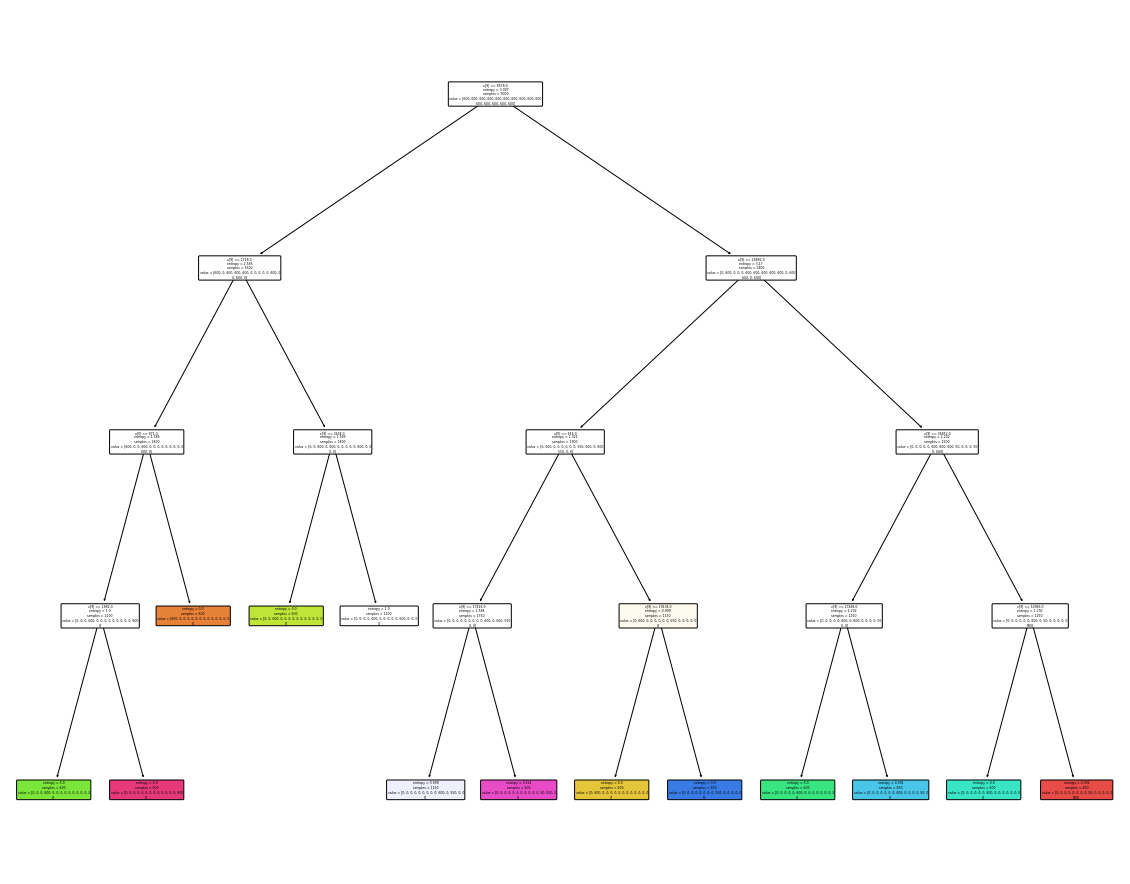

In [22]:
import pandas as pd
from sklearn import tree
import matplotlib.pyplot as plt

file_name = '../measurements.csv'
df = pd.read_csv(file_name, header=0, delimiter=",", decimal=".")

replace_map = {
    'Program': {
        'BubbleSort ': 0,
        'QuickSort ': 1,
        'SelectionSort ': 2
    }
}

replace_map2 = {'Language': {
                    'C ':0 ,
                    'Python Interpreted ': 1, 
                    'Python Compilled ': 2,
                    'Haskell ':3,
                    'Java ':4,
                    'C++ ':5,
                    'Prolog ':6,
                    'Ruby ':7,
                    'PHP ':8,
                    'Kotlin ':9,
                    'JavaScript ':10,
                    'C# ':11,
                    'Rust ':12,
                    'Go ':13,
                    'Scala ':14
                    }}

y = df["Language"]
x = df.drop(columns=['Language'])
x.replace(replace_map, inplace=True)
x.replace(replace_map2,inplace=True)


clf = tree.DecisionTreeClassifier(criterion='entropy', ccp_alpha=0.1)

plt.figure(figsize=(20, 16))
clf = clf.fit(x, y)
tree.plot_tree(clf, filled=True, rounded=True)
plt.show()


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [24]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=2023)

In [25]:
clf = DecisionTreeClassifier(random_state=2023)
clf = clf.fit(x_train,y_train)

In [26]:
predictions_train = clf.predict(x_train)
predictions_test = clf.predict(x_test)

In [27]:
print("Classification report for training data")
print(classification_report(y_train, predictions_train))
print("\nClassification report for test data")
print(classification_report(y_test, predictions_test))

if (accuracy_score(y_test, predictions_test) <= accuracy_score(y_train, predictions_train)):
    print("Model is overfitted")
else:
    print("Model is not overfitted")

Classification report for training data
                     precision    recall  f1-score   support

                 C        1.00      1.00      1.00       447
                C#        1.00      1.00      1.00       453
               C++        1.00      1.00      1.00       448
                Go        1.00      1.00      1.00       433
           Haskell        1.00      1.00      1.00       440
              Java        1.00      1.00      1.00       457
        JavaScript        1.00      1.00      1.00       451
            Kotlin        1.00      1.00      1.00       462
               PHP        1.00      1.00      1.00       458
            Prolog        1.00      1.00      1.00       451
  Python Compilled        1.00      1.00      1.00       469
Python Interpreted        1.00      1.00      1.00       450
              Ruby        1.00      1.00      1.00       427
              Rust        1.00      1.00      1.00       452
             Scala        1.00      1.00    

### Tuning

In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [3, 4, 5, 6],
              'min_samples_leaf': [0.05, 0.1, 0.2]}

model = DecisionTreeClassifier(random_state = 2022)

grid_search = GridSearchCV(model, param_grid, cv=6)

grid_search.fit(x_train, y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

predictions_train = grid_search.predict(x_train)
predictions_test = grid_search.predict(x_test)

print("Classification report for training data")
print(classification_report(y_train, predictions_train))
print("\nClassification report for test data")
print(classification_report(y_test, predictions_test))

if (accuracy_score(y_test, predictions_test) <= accuracy_score(y_train, predictions_train)):
    print("Model is overfitted")
else:
    print("Model is not overfitted")

Best parameters:  {'max_depth': 6, 'min_samples_leaf': 0.05}
Best score:  0.8954074074074073
Classification report for training data
                     precision    recall  f1-score   support

                 C        1.00      1.00      1.00       447
                C#        1.00      1.00      1.00       453
               C++        1.00      1.00      1.00       448
                Go        1.00      1.00      1.00       433
           Haskell        0.80      0.65      0.72       440
              Java        1.00      1.00      1.00       457
        JavaScript        1.00      1.00      1.00       451
            Kotlin        0.86      1.00      0.92       462
               PHP        1.00      0.93      0.96       458
            Prolog        0.61      0.53      0.57       451
  Python Compilled        0.72      0.85      0.78       469
Python Interpreted        0.56      0.59      0.57       450
              Ruby        0.92      0.90      0.91       427
            